<a href="https://colab.research.google.com/github/vitormm44/materia-dl/blob/master/Tarefa_3_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas e dataset

In [6]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tensorflow.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


Normalizando as imagens de treino e teste

In [4]:
train_images = train_images/255 - 0.5
test_images = test_images/255 - 0.5

Adicionando mais uma dimensão nas imagens de treino e teste

In [7]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Criando, compilando e treinando a Rede

In [43]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

num_filters = 8
filter_size = 3
pool_size = 2

modelo = tensorflow.keras.models.Sequential([#Conv2D(32, filter_size, input_shape=(28,28,1)),
                                             Conv2D(32, kernel_size = (5,5), strides = (1,1), activation = 'relu', input_shape = (28, 28, 1)),
                                             MaxPooling2D(pool_size=pool_size),
                                             Dropout(.3),
                                             Conv2D(16, filter_size),
                                             MaxPooling2D(pool_size=4),
                                             Flatten(),
                                             Dense(10, activation='softmax')
                                             ])

In [44]:
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [45]:
historico = modelo.fit(train_images,
           tensorflow.keras.utils.to_categorical(train_labels),
           epochs=5,
           validation_data=(test_images, tensorflow.keras.utils.to_categorical(test_labels))
    
)

Epoch 1/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3221 - accuracy: 0.9027 - val_loss: 0.1122 - val_accuracy: 0.9656
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1231 - accuracy: 0.9613 - val_loss: 0.0753 - val_accuracy: 0.9764
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0989 - accuracy: 0.9693 - val_loss: 0.0671 - val_accuracy: 0.9772
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0844 - accuracy: 0.9744 - val_loss: 0.0633 - val_accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0785 - accuracy: 0.9757 - val_loss: 0.0657 - val_accuracy: 0.9795


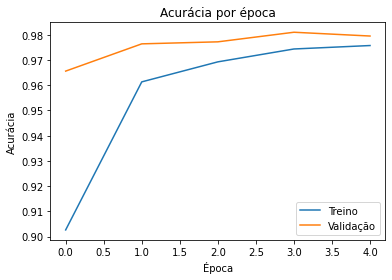

In [46]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

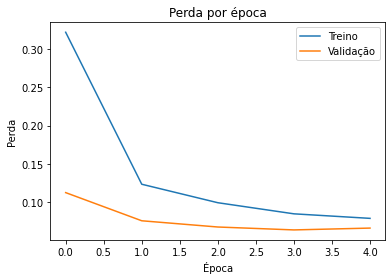

In [47]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

In [51]:
modelo_aula = tensorflow.keras.models.Sequential([
                                             Conv2D(32, kernel_size = (5,5), strides = (1,1), activation = 'relu', input_shape = (28, 28, 1)),
                                             MaxPooling2D(pool_size = (2,2), strides = (2,2)),
                                             Conv2D(64, (5,5), activation = 'relu'),
                                             MaxPooling2D(pool_size = (2,2)),
                                             Flatten(),
                                             Dropout(0.4),
                                             Dense(1000, activation = 'relu'),
                                             Dense(10, activation = 'softmax'),
                                             ])

modelo_aula.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

historico_aula = modelo_aula.fit(train_images,
           tensorflow.keras.utils.to_categorical(train_labels),
           epochs=5,
           validation_data=(test_images, tensorflow.keras.utils.to_categorical(test_labels))
    
)

Epoch 1/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1307 - accuracy: 0.9596 - val_loss: 0.0380 - val_accuracy: 0.9872
Epoch 2/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0549 - accuracy: 0.9834 - val_loss: 0.0262 - val_accuracy: 0.9919
Epoch 3/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0426 - accuracy: 0.9872 - val_loss: 0.0257 - val_accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0303 - val_accuracy: 0.9892
Epoch 5/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.0272 - val_accuracy: 0.9919


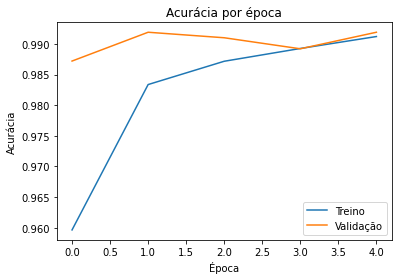

In [52]:
plt.plot(historico_aula.history['accuracy'])
plt.plot(historico_aula.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

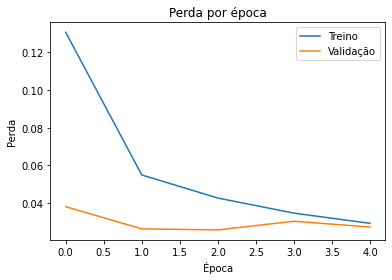

In [53]:
plt.plot(historico_aula.history['loss'])
plt.plot(historico_aula.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

Teste variáveis para quebrar o modelo

In [70]:
modelo_quebrado = tensorflow.keras.models.Sequential([
                                             Conv2D(4, kernel_size = (5,5), strides = (2,2), activation = 'relu', input_shape = (28, 28, 1)),
                                             MaxPooling2D(pool_size = (2,2), strides = (2,2)),
                                             Conv2D(2, (5,5), activation = 'relu'),
                                             MaxPooling2D(pool_size = (2,2)),
                                             Flatten(),
                                             Dropout(0.7),
                                             Dense(10, activation = 'relu'),
                                             Dense(10, activation = 'softmax'),
                                             ])

modelo_quebrado.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

historico_quebrado = modelo_quebrado.fit(train_images,
           tensorflow.keras.utils.to_categorical(train_labels),
           epochs=3,
           validation_data=(test_images, tensorflow.keras.utils.to_categorical(test_labels))
    
)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3018 - accuracy: 0.1110 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
